
<h1><center>EE769-ASSIGNMENT-1</center></h1>
<h2><center>Badal Varshney, 19D070015</center></h2>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
# importing numpy
import numpy as np
import seaborn
import pandas as pd

 Q1. Write a function to generate a data matrix X. Inputs: Number of samples, feature dimension. Output: Data Matrix X.

In [3]:
# function to generate 'X' data matrix
def data_matrix(num_of_samples, feat_dim):                        # Output should be a data matrix X
  r = num_of_samples                                              # no. of samples taken
  # np.random.seed(0)                                               # Generates pseudo-random number based on seed
  X = np.random.normal(0,2000,size = (num_of_samples, feat_dim))  # uses random gaussian for generating X
  X = np.c_[np.ones(r),X]                                         # Adding a column of 1's - Bias in X
  return X

In [4]:
# testing values
num_of_samples = 1000   # no. of samples
feat_dim = 10           # feature dimension
mu=0.0                  # mean for gaussian noise
std = 0.1               # standard deviation for gaussian noise
X = data_matrix(num_of_samples, feat_dim)                            # Data matrix X
w_target = np.random.randint(num_of_samples, size = (feat_dim+1,1))  # weight vector for target value (fixed)
w = np.random.randint(num_of_samples, size = (feat_dim+1,1))         # weight vector for prediction values

In [5]:
'''
TEST CASES
'''
num_of_samples_1 = 2
feat_dim_1 = 2 
# run after use seed in data matrix function
# np.testing.assert_almost_equal(data_matrix(num_of_samples_1, feat_dim_1),np.array([[1,352.810469, 80.031442], [1,195.747597, 448.17864]]),decimal=0)

Q2. Write a function to generated dependent variable column t.

(a) Inputs: Data matrix X, weight vector for each column, bias w0, noise variance

b) Output: Target vector t
<center>$t = w^Tx + noise$</center>

In [6]:
def noise(X, mu, std):
  noiise = np.random.normal(mu, std, size = (len(X),1))  # gaussian noise with mean 'mu' and standaed deviation 'std'
  return noiise

In [7]:
def target_t(X, w_target, noise_var):                     # Output should be a target vector t
    # np.random.seed(0)                                     # Generates pseudo-random number based on seedz
    t = np.dot( X,w_target) + noise_var                   # target vector t = (w^T)x + noise with weight vector w_target
    return t

In [8]:
'''
TEST CASES
'''
X1 = np.array([[1,5,4],[1,8,2]])
w1 = np.array([2,1,1])
noise_var = 10
# run after use seed in data matrix function
# np.testing.assert_almost_equal(target_t(X1,w1),np.array([[11.176405, 12.176405],[11.040016, 12.040016]]),decimal=3)

Q3. Write a function to compute a linear regression estimate.

a) Input: data matrix X and weight vector w

b) Output: y
<center>$y = w^Tx $</center>

In [9]:
def pred_y(X, w):       # Output should be a prediction vector y
  y = np.dot(X,w)       # prediction vector y = (w^T)x with weight vector w
  return y

In [10]:
'''
TEST CASES
'''
X1 = np.array([[1,3,2],[1,1,1]])
w1 = np.array([2,1,1]) 
np.testing.assert_array_equal(pred_y(X1,w1),np.array([7,4]))

Q4. Write a function to compute the mean square error of two vectors y and t.

<center>
$MSE = 1/n \sum_{i=1}^n (y - t)^2$
</center>

In [11]:
def MSE(X, w, t):                                   # Output should be a MSE value
    MSE = np.mean(np.square(pred_y(X, w) - t))      # MSE = (sum(y-t)^2)/N
    return MSE

In [12]:
'''
TEST CASES
'''
X1=np.array([[1,3,6],[1,4.5,6]])
w1 = np.array([2,1,1]) 
t1=np.array([11.176405, 12.176405])
np.testing.assert_almost_equal(MSE(X1,w1,t1),np.array([0.068]),decimal=3)

Q5. Write a function to estimate the weights of linear regression using pseudo-inverse, assuming L2 regularization:

a) Input: X, t, and lambda

b) Output: w, MSE, y
<center>
$w = (X^T X + \lambda I)^{-1} X^T t$
</center>

In [13]:
def Pseudo_Inverse(X, t, lambda1):                                             # Output should be weight vector, prediction vector, MSE value
    I=np.identity(len(X[0]))                                                   # Identity Matrix
    X_t=np.transpose(X)                                                        # Xtranspose=X'
    w_new=np.dot(np.dot(np.linalg.inv((np.dot(X_t,X)+lambda1*I)),X_t),t)       # w = (X' X + lambda I)^(-1) X' t
    y_new = pred_y(X,w_new)                                                    # y = (w^T).X
    MSE_new = MSE(X, w_new, t)                                                 # MSE = (sum(y-t)^2)/N
    return w_new, y_new, MSE_new

In [14]:
'''
TEST CASES
'''
X1=np.array([[1,3,6,5],[1,4.5,6.6,6]])
t1=np.array([4,5.5])
np.testing.assert_array_almost_equal(Pseudo_Inverse(X1,t1,0.5)[0],np.array([ -0.003,  0.491,  0.183,  0.319]),decimal=3)  # testing for weight vector
np.testing.assert_array_almost_equal(Pseudo_Inverse(X1,t1,0.5)[1],np.array([ 4.168, 5.334]),decimal=3)                    # testing for prediction vector
np.testing.assert_almost_equal(Pseudo_Inverse(X1,t1,0.5)[2],np.array([ 0.028]),decimal=3)                                 # testing for MSE value

Q6. Write a function to compute the gradient of MSE with respect to its weight vector.

a) Input: X matrix, t vector, and w vector

b) Output: gradient vector
<center>
$MSE$_$Grad = (1/n)∑_i[(wi.xi-ti)xi]$
</center>

In [15]:
def MSE_Gradient(X, t, w):                                                   # Output should be MSE gradient vector (have the same size as w)
    mse_grad = []                                                            #initialize 
    for i in range(0,len(w)):
      sum = 0
      for j in range(0, len(X)):
        sum += (1/len(X))*(pred_y(X,w)[i] - t[i])*X[j][i]                    # (1/n)sum[(wi.xi-ti)xi]
      mse_grad.append(sum)
    mse_grad = np.array(mse_grad).reshape(len(w),1)/np.linalg.norm(mse_grad) # (1/n)sum[(wi.xi-ti)xi])/norm
    return mse_grad

In [16]:
'''
TEST CASES
'''
X1=np.array([[1,1,3,6],[1,1,4.5,6]])
w1 = np.array([2,1,1,1]) 
t1=np.array([11.176405, 12.176405])
# run after use seed in data matrix function
# np.testing.assert_almost_equal(MSE_Gradient(X,w,target_t(X,w_target)),np.array([ -2.14719  ,  -2.14719  ,  -8.4269625, -12.88314  ]),decimal=3)

Q7. Write a function to compute L2 norm of a vector w passed as a numpy array. Exclude bias w0.
<center>
$L2$_$norm = \sqrt{(w1^2+w2^2+...wn^2)}$
</center>

In [17]:
def L2_norm(w):                                       # Output should be a single number based on L2-norm (with sqrt)
  L2_norm  = np.sqrt(np.sum([i**2 for i in w[1:]]))   # (w1^2+w2^2+...wn^2)^0.5
  return L2_norm

In [18]:
'''
TEST CASES, DO NOT CHANGE
'''
w1=np.array([0,2,-1,0.5,1])
np.testing.assert_almost_equal(L2_norm(w1),2.5,decimal=3)

Q8. Write a function to compute the gradient of L2 norm with respect to the weight vectors.

a) Input: X matrix and w vector

b) Output: gradient vector, where gradient with respect to w0 is 0.
<center>
$L2$_$Grad =\sum_i \frac{wi}{\sqrt{(w1^2+w2^2+...wn^2)}}$
</center>

In [19]:
def L2_Gradient(w):                         # Output should have the same size as w
    L2_grad=np.zeros(len(w));               # initialize
    for i in range(1,len(w)):
      L2_grad[i]=(w[i]/L2_norm(w))          # sum[wi/L2_Norm]
    return L2_grad

In [20]:
'''
TEST CASES
'''
w1=np.array([0,2,-1,0.5,1])
np.testing.assert_array_almost_equal(L2_Gradient(w1),np.array([ 0. ,  0.8, -0.4,  0.2,  0.4]),decimal=3)


Q9. Write a function to compute L1 norm of a vector w passed as a numpy array. Exclude bias w0.
<center>
$L1$_$norm = |w1|+|w2|+....+|wn|$
</center>

In [21]:
def L1_norm(w):                                   # Output should be a single number
  L1_norm  = np.sum([np.abs(i) for i in w[1:]])   # (|w1|+|w2|+...|wn|)
  return L1_norm

In [22]:
'''
TEST CASES
'''
w1=np.array([0,2,-1,0.5,1])
np.testing.assert_almost_equal(L1_norm(w1),4.5,decimal=3)

Q10. Write a function to compute the gradient of L1 norm with respect to the weight vectors.

a) Input: X matrix and w vector

b) Output: gradient vector, where gradient with respect to w0 is 0.
<center>
$L1$_$Grad = ∑_i[sign(wi)]$
</center>

In [23]:
def L1_Gradient (w):                    # Output should have the same size as w
    L1_grad=np.zeros(len(w));           # initialize
    for i in range(1,len(w)):
        L1_grad[i]= (np.sign(w[i]))     # sum[sign(wi)]       
    return np.array(L1_grad)

In [24]:
'''
TEST CASES
'''
w1=np.array([0,2,-1,0.5,1])
np.testing.assert_array_almost_equal(L1_Gradient(w1),np.array([ 0, 1, -1, 1, 1]),decimal=3)

Q11. Write a function for a single update of weights of linear regression using gradient descent.

a) Input: X, t, w, eta, lambda 2, lambda 1. Note that the weight of MSE will be 1

b) Output: updated weight and updated MSE
<center>
$w$_$new = w$_$old - η.∇_wL(w)$
</center>

In [25]:
def gradfun(X,t,w,eta,lambda_2,lambda_1):                                           # Output should be weight vector, MSE value
  L2_grad = L2_Gradient(w).reshape(feat_dim+1,1)                                    # Reshape L2 gradient vector
  L1_grad = L1_Gradient(w).reshape(feat_dim+1,1)                                    # Reshape L1 gradient vector
  grad_loss = MSE_Gradient(X, t, w) + lambda_2*L2_grad + lambda_1*L1_grad           # grad_L = MSE gradient vector + lambda2*L2 gradient vector + lambda1*L1 gradient vector
  w_updated = w - eta*grad_loss                                                     # w = w - eta*grad_L
  MSE_updated = MSE(X, w_updated, t)                                                # MSE = (sum(y-t)^2)/N
  return w_updated, MSE_updated

In [26]:
'''
TEST CASES
'''
X1=np.array([[1,3,6,5],[1,4.5,6.6,6]])
t1=np.array([4,5.5])
w1=np.array([0,2,-1,0.5])
# run after use seed in data matrix function
# np.testing.assert_allclose(gradfun(X1,t1,w1,0.5,0.2,0.2),np.array([2.55, 2.94, 2.9 , 0.4 ]))
# gradfun(X1,t1,w1,0.5,0.2,0.2)

Q12. Write a function to estimate the weights of linear regression using gradient descent.

a) Inputs: X, t, lambda2 (default 0), lambda1 (default 0), eta, max_iter, min_change_NRMSE

b) Output: Final w, final RMSE normalized with respect to variance of t.

c) Stopping criteria: Either max_iter has been reached, or the normalized RMSE does not change by more than
min_change_NRMSE
<center>
$w$_$new = w$_$old - η.∇_wL(w)$
</center><center>
$w$_old = w_$new$

until &nbsp;&nbsp;|Δ.w|<ϵ  &nbsp;&nbsp;  or &nbsp;&nbsp;||∇$_wL(w)||<ϵ$
</center>

In [27]:
def Gradient_Descent(X,w, t, eta, max_iter, min_change_NRMSE, lambda_2=0, lambda_1=0):   # Output should be weight vector, NRMSE value
    initial_NRMSE = np.Inf                                                                     # initialize Initial NRMSE = inf
    initial_w = w                                                                              # initialize weight vector
    for i in range(max_iter):
      w_grad, MSE = gradfun(X,t,initial_w,eta,lambda_2,lambda_1)                               # Calculate the update weights and updatd MSE
      # print(w_grad)
      NRMSE = np.sqrt(MSE)/np.std(t)                                                           # It should be a single number. RMSE/var(t) 
      # print(NRMSE)
      if abs(initial_NRMSE - NRMSE) < min_change_NRMSE:                                        # if difference between current and previous error is less the min_change_NRMSE then stop iteration
          # print(i)
          break
      initial_NRMSE = NRMSE                                                                    # update NRMSE
      initial_w = w_grad                                                                       # update weight vector
    return initial_w, initial_NRMSE                                                            #You should return variables structured like this

Q13. Run multiple experiments (with different random seeds) for, plot the results of (box plots), and comment on the trends and
potential reasons for the following relations:

a) Training and validation NRMSE obtained using pseudo inverse with number of training samples


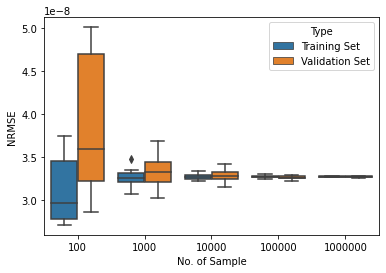

In [ ]:
samples = [100,1000,10000,100000,100000, 1000000]                                                                    # Number of samples
feat_dim = 10                                                                                                        # feature dimension
w_target = np.random.randint(num_of_samples, size = (feat_dim+1,1))                                                  # weight vector for target value (fixed)
dic_NRMSE = []                                                                                                       # initialize for NRMSE Q13 part (a)
for seeed in range(0,15):
  np.random.seed(seeed)                                                                                              # Generates pseudo-random number based on seed
  for no_samples in samples:
    X1 = data_matrix(no_samples, feat_dim)                                                                           # Data Matrix X
    X1_training, X1_validation = X1[:int(0.7*no_samples)], X1[int(0.7*no_samples):]                                  # split X into training and validation set
 
    w_train, y_train, MSE_train = Pseudo_Inverse(X1_training, target_t(X1_training, w_target, noise(X1_training, mu, std)), lambda1 =0)           # calculate training weight vector and MSE value from pseudoInverse
    MSE_valid = MSE(X1_validation , w_train, target_t(X1_validation, w_target, noise(X1_validation, mu, std)))                                    # find the value of validation MSE

    t_train = target_t(X1_training, w_target, noise(X1_training, mu, std))                                                 # training target vector t
    t_valid = target_t(X1_validation, w_target, noise(X1_validation, mu, std))                                             # validation target vector t
    NRMSE_train = np.sqrt(MSE_train)/np.std(t_train)                                                                       # It should be a single number. Training_RMSE/std_dev(t) 
    NRMSE_valid = np.sqrt(MSE_valid)/np.std(t_valid)                                                                       # It should be a single number. Vaildation_RMSE/std_dev(t)

    dic_NRMSE.append({'seed': seeed, 'NRMSE': NRMSE_train, 'No. of Sample': no_samples, 'Type': "Training Set"})     # append the data of Training set of NRMSE
    dic_NRMSE.append({'seed': seeed, 'NRMSE': NRMSE_valid, 'No. of Sample': no_samples, 'Type': "Validation Set"})   # append the data of Validation set of NRMSE

NRMSE_df_a = pd.DataFrame(dic_NRMSE)                                                                                 # make dataframe 
NRMSE_df_a.to_csv("/content/drive/My Drive/q_13_a.csv")                                                                             # save the file into drive
# print(NRMSE_df_a)
seaborn.boxplot(data = NRMSE_df_a , x="No. of Sample", y="NRMSE", hue="Type")  

We notice here that, mean of NRMSE is same for any number of samples value but variance of NRMSE decreases as number of samples value increases for both Training and Validation Data Set.

In [ ]:
a_graph = pd.read_csv("drive/My Drive/q_13_a.csv")                          # load the file from drive
# seaborn.boxplot(data = a_graph, x="No. of Sample", y="NRMSE", hue="Type")

b) Training and validation NRMSE obtained using pseudo inverse with number of variables

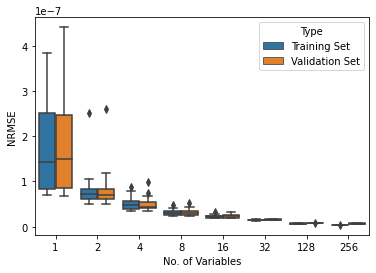

In [ ]:
num_of_samples = 1000                                                                                                # no. of samples
variables = [1,2,4,8,16,32,128,256]                                                                                # feature dimension
dic_NRMSE = []                                                                                                       # initialize for NRMSE Q13 part (a)
for seeed in range(0,15):
  np.random.seed(seeed)                                                                                              # Generates pseudo-random number based on seed
  for no_variables in variables:
    w_target = np.random.randint(num_of_samples, size = (no_variables+1,1))                                          # weight vector for target value (fixed)
    X1 = data_matrix(num_of_samples, no_variables)                                                                   # Data Matrix X
    X1_training, X1_validation = X1[:int(0.7*num_of_samples)], X1[int(0.7*num_of_samples):]                          # split X into training and validation set
    w_train, y_train, MSE_train = Pseudo_Inverse(X1_training, target_t(X1_training, w_target, noise(X1_training, mu, std)), lambda1 =0)           # calculate training weight vector and MSE value from pseudoInverse

    MSE_valid = MSE(X1_validation , w_train, target_t(X1_validation, w_target, noise(X1_validation, mu, std)))                                    # find the value of validation MSE


    t_train = target_t(X1_training, w_target, noise(X1_training, mu, std))                                                 # training target vector t
    t_valid = target_t(X1_validation, w_target, noise(X1_validation, mu, std))                                             # validation target vector t
    NRMSE_train = np.sqrt(MSE_train)/np.std(t_train)                                                                       # It should be a single number. Training_RMSE/std_dev(t) 
    NRMSE_valid = np.sqrt(MSE_valid)/np.std(t_valid)                                                                       # It should be a single number. Vaildation_RMSE/std_dev(t)

    dic_NRMSE.append({'seed': seeed, 'NRMSE': NRMSE_train, 'No. of Variables': no_variables, 'Type': "Training Set"})     # append the data of Training set of NRMSE
    dic_NRMSE.append({'seed': seeed, 'NRMSE': NRMSE_valid, 'No. of Variables': no_variables, 'Type': "Validation Set"})   # append the data of Validation set of NRMSE

NRMSE_df_b = pd.DataFrame(dic_NRMSE)                                                                                 # make dataframe 
NRMSE_df_b.to_csv("/content/drive/My Drive/q_13_b.csv")                                                                             # save the file into drive
# print(NRMSE_df_b)
seaborn.boxplot(data = NRMSE_df_b , x="No. of Variables", y="NRMSE", hue="Type")

The NRMSE value decreases as number of variables increases. As we seen in error vs Model complexity model in class, Training error decreases as model complexity increases which we can seen above in boxplot but validation error first decreases then increases (overfitting area) as model complexity increases but i am not able to observe the sweet spot in above boxplot where validation error increases because it takes too much time to run.

In [ ]:
b_graph = pd.read_csv("drive/My Drive/q_13_b.csv")                          # load the file from drive
# seaborn.boxplot(data = b_graph, x="No. of Variables", y="NRMSE", hue="Type")

c) Training and validation NRMSE obtained using pseudo inverse with noise variance

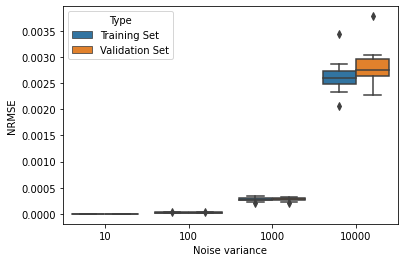

In [ ]:
num_of_samples = 1000                                                                                                # no. of samples
feat_dimens = 10                                                                                                     # feature dimension
noise_vari = [10,100,1000,10000]
dic_NRMSE = []                                                                                                       # initialize for NRMSE 
for seeed in range(0,15):
  np.random.seed(seeed)                                                                                              # Generates pseudo-random number based on seed
  for noiise in noise_vari:
    w_target = np.random.randint(num_of_samples, size = (feat_dimens+1,1))                                          # weight vector for target value (fixed)
    X1 = data_matrix(num_of_samples, feat_dimens)                                                                   # Data Matrix X
    X1_training, X1_validation = X1[:int(0.7*num_of_samples)], X1[int(0.7*num_of_samples):]                          # split X into training and validation set
    w_train, y_train, MSE_train = Pseudo_Inverse(X1_training, target_t(X1_training, w_target, noise(X1_training, mu, noiise)), lambda1 =0)           # calculate training weight vector and MSE value from pseudoInverse

    MSE_valid = MSE(X1_validation , w_train, target_t(X1_validation, w_target, noise(X1_validation, mu, noiise)))                                    # find the value of validation MSE


    t_train = target_t(X1_training, w_target, noise(X1_training, mu, std))                                                 # training target vector t
    t_valid = target_t(X1_validation, w_target, noise(X1_validation, mu, std))                                             # validation target vector t
    NRMSE_train = np.sqrt(MSE_train)/np.std(t_train)                                                                       # It should be a single number. Training_RMSE/std_dev(t) 
    NRMSE_valid = np.sqrt(MSE_valid)/np.std(t_valid)                                                                       # It should be a single number. Vaildation_RMSE/std_dev(t)

    dic_NRMSE.append({'seed': seeed, 'NRMSE': NRMSE_train, 'Noise variance': noiise, 'Type': "Training Set"})     # append the data of Training set of NRMSE
    dic_NRMSE.append({'seed': seeed, 'NRMSE': NRMSE_valid, 'Noise variance': noiise, 'Type': "Validation Set"})   # append the data of Validation set of NRMSE
 
NRMSE_df_c = pd.DataFrame(dic_NRMSE)                                                                              # make dataframe
NRMSE_df_c.to_csv("/content/drive/My Drive/q_13_c.csv")                                                                          # save the file into drive    
# print(NRMSE_df_c)
seaborn.boxplot(data = NRMSE_df_c , x="Noise variance", y="NRMSE", hue="Type")

The NRMSE value increases as noise variance increases. It is logically true because as the noise increases in model, they gave more error.

In [ ]:
c_graph = pd.read_csv("drive/My Drive/q_13_c.csv")                          # load the file from drive
# seaborn.boxplot(data = c_graph, x="Noise variance", y="NRMSE", hue="Type")

d) Training and validation NRMSE obtained using pseudo inverse with w0

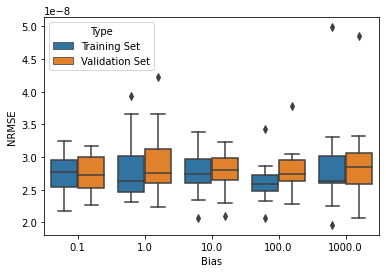

In [ ]:
num_of_samples = 1000                                                                                                # no. of samples
feat_dimens = 10                                                                                                     # feature dimension
bias = [0.1,1,10,100,1000]
dic_NRMSE = []                                                                                                       # initialize for NRMSE 
for seeed in range(0,15):
  np.random.seed(seeed)                                                                                              # Generates pseudo-random number based on seed
  for w0 in bias:
    w_target = np.random.randint(num_of_samples, size = (feat_dimens+1,1))                                           # weight vector for target value (fixed)
    w_target[0] = w0
    X1 = data_matrix(num_of_samples, feat_dimens)                                                                    # Data Matrix X
    X1_training, X1_validation = X1[:int(0.7*num_of_samples)], X1[int(0.7*num_of_samples):]                          # split X into training and validation set
    w_train, y_train, MSE_train = Pseudo_Inverse(X1_training, target_t(X1_training, w_target, noise(X1_training, mu, std)), lambda1 =0)           # calculate training weight vector and MSE value from pseudoInverse

    MSE_valid = MSE(X1_validation , w_train, target_t(X1_validation, w_target, noise(X1_validation, mu, std)))                                    # find the value of validation MSE


    t_train = target_t(X1_training, w_target, noise(X1_training, mu, std))                                                 # training target vector t
    t_valid = target_t(X1_validation, w_target, noise(X1_validation, mu, std))                                             # validation target vector t
    NRMSE_train = np.sqrt(MSE_train)/np.std(t_train)                                                                       # It should be a single number. Training_RMSE/std_dev(t) 
    NRMSE_valid = np.sqrt(MSE_valid)/np.std(t_valid)                                                                       # It should be a single number. Vaildation_RMSE/std_dev(t)

    dic_NRMSE.append({'seed': seeed, 'NRMSE': NRMSE_train, 'Bias': w0, 'Type': "Training Set"})     # append the data of Training set of NRMSE
    dic_NRMSE.append({'seed': seeed, 'NRMSE': NRMSE_valid, 'Bias': w0, 'Type': "Validation Set"})   # append the data of Validation set of NRMSE

NRMSE_df_d = pd.DataFrame(dic_NRMSE)                                                                # make dataframe
NRMSE_df_d.to_csv("/content/drive/My Drive/q_13_d.csv")                                                            # save the file into drive 
# print(NRMSE_df_d)
seaborn.boxplot(data = NRMSE_df_d , x="Bias", y="NRMSE", hue="Type")

The NRMSE value does not depend on Bias as we can see the same in above boxplot. As the Bias increases, we does not see any relation.

In [ ]:
d_graph = pd.read_csv("drive/My Drive/q_13_d.csv")                          # load the file from drive
# seaborn.boxplot(data = d_graph, x="Bias", y="NRMSE", hue="Type")

e) Training and validation NRMSE obtained using pseudo inverse with lambda2

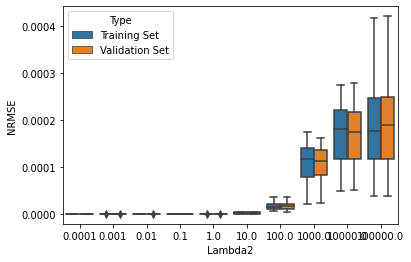

In [ ]:
num_of_samples = 1000                                                                                                # no. of samples
feat_dimens = 10                                                                                                     # feature dimension
lambda2 = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000]
dic_NRMSE = []                                                                                                       # initialize for NRMSE 

for seeed in range(0,15):
  np.random.seed(seeed)                                                                                              # Generates pseudo-random number based on seed
  for lb in lambda2:
    w_target = np.random.randint(num_of_samples, size = (feat_dimens+1,1))                                           # weight vector for target value (fixed)
    X1 = data_matrix(num_of_samples, feat_dimens)                                                                    # Data Matrix X
    X1_training, X1_validation = X1[:int(0.7*num_of_samples)], X1[int(0.7*num_of_samples):]                          # split X into training and validation set
    w_train, y_train, MSE_train = Pseudo_Inverse(X1_training, target_t(X1_training, w_target, noise(X1_training, mu, std)), lb)           # calculate training weight vector and MSE value from pseudoInverse

    MSE_valid = MSE(X1_validation , w_train, target_t(X1_validation, w_target, noise(X1_validation, mu, std)))                            # find the value of validation MSE

    t_train = target_t(X1_training, w_target, noise(X1_training, mu, std))                                                 # training target vector t
    t_valid = target_t(X1_validation, w_target, noise(X1_validation, mu, std))                                             # validation target vector t
    NRMSE_train = np.sqrt(MSE_train)/np.std(t_train)                                                                       # It should be a single number. Training_RMSE/std_dev(t) 
    NRMSE_valid = np.sqrt(MSE_valid)/np.std(t_valid)                                                                       # It should be a single number. Vaildation_RMSE/std_dev(t)

    dic_NRMSE.append({'seed': seeed, 'NRMSE': NRMSE_train, 'Lambda2': lb, 'Type': "Training Set"})     # append the data of Training set of NRMSE
    dic_NRMSE.append({'seed': seeed, 'NRMSE': NRMSE_valid, 'Lambda2': lb, 'Type': "Validation Set"})   # append the data of Validation set of NRMSE

NRMSE_df_e = pd.DataFrame(dic_NRMSE)                                                                   # make dataframe
NRMSE_df_e.to_csv("/content/drive/My Drive/q_13_e.csv")                                                               # save the file into drive 
# print(NRMSE_df_e)
seaborn.boxplot(data = NRMSE_df_e , x="Lambda2", y="NRMSE", hue="Type")

As the value of lambda increases, the high value of weight vector we get according to equation , <center>
$w = (X^T X + \lambda I)^{-1} X^T t$
</center> so that we get more error which we can see in above boxplot.

In [ ]:
e_graph = pd.read_csv("drive/My Drive/q_13_e.csv")                          # load the file from drive
# seaborn.boxplot(data = e_graph, x="Lambda2", y="NRMSE", hue="Type")

f) Time taken to solve pseudo inverse with number of samples and number of variables and its breaking points

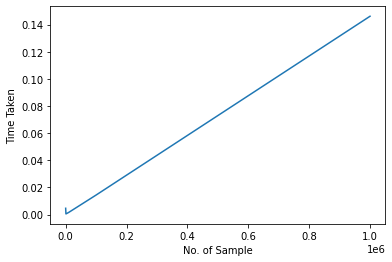

In [ ]:
samples = [100,1000,10000,100000,100000, 1000000]                                                                    # Number of samples
feat_dim = 10                                                                                                        # feature dimension
w_target = np.random.randint(num_of_samples, size = (feat_dim+1,1))                                                  # weight vector for target value (fixed)
dic_NRMSE = []                                                                                                       # initialize for NRMSE Q13 part (a)
dic_time = []                                                                                                        # initialize for time Q13 part (f)
import time
                                                                                      
for no_samples in samples:
  X1 = data_matrix(no_samples, feat_dim)                                                                           # Data Matrix X
  X1_training, X1_validation = X1[:int(0.7*no_samples)], X1[int(0.7*no_samples):]                                  # split X into training and validation set
  start = time.time()                                                                                              # Start Time

  w_train, y_train, MSE_train = Pseudo_Inverse(X1_training, target_t(X1_training, w_target, noise(X1_training, mu, std)), lambda1 =0)           # calculate training weight vector and MSE value from pseudoInverse
  last = time.time()                                                                                               # End Time
  time_taken = last - start                                                                                        # Time Taken to run pseudoIverse function
  MSE_valid = MSE(X1_validation , w_train, target_t(X1_validation, w_target, noise(X1_validation, mu, std)))       # find the value of validation MSE

  t_train = target_t(X1_training, w_target, noise(X1_training, mu, std))                                                 # training target vector t
  t_valid = target_t(X1_validation, w_target, noise(X1_validation, mu, std))                                             # validation target vector t
  NRMSE_train = np.sqrt(MSE_train)/np.std(t_train)                                                                       # It should be a single number. Training_RMSE/std_dev(t) 
  NRMSE_valid = np.sqrt(MSE_valid)/np.std(t_valid)                                                                       # It should be a single number. Vaildation_RMSE/std_dev(t)

  dic_NRMSE.append({'NRMSE': NRMSE_train, 'No. of Sample': no_samples, 'Type': "Training Set"})     # append the data of Training set of NRMSE
  dic_NRMSE.append({'NRMSE': NRMSE_valid, 'No. of Sample': no_samples, 'Type': "Validation Set"})   # append the data of Validation set of NRMSE
  dic_time.append({'Time Taken': time_taken, 'No. of Sample': no_samples})                          # append the data of Time taken

time_df_f1 = pd.DataFrame(dic_time)                                                                 # make dataframe
time_df_f1.to_csv("/content/drive/My Drive/q_13_f1.csv")                                                           # save the file into drive 
# print(time_df_f1)
seaborn.lineplot(data = time_df_f1 , x="No. of Sample", y="Time Taken")

As the number of samples increases, it take more time to find pseudo Inverse because of matrix multiplication take more time to do large data calculation. Here we can observe the graph between time taken and number of samples increases linearly.

In [ ]:
f1_graph = pd.read_csv("drive/My Drive/q_13_f1.csv")                          # load the file from drive
# seaborn.lineplot(data = f1_graph, x="No. of Sample", y="Time Taken")

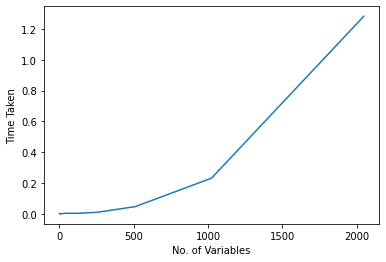

In [ ]:
num_of_samples = 1000                                                                                                # no. of samples
variables = [1,2,4,8,16,32,64,128,256,512,1024,2048]                                                            # feature dimension
dic_NRMSE = []                                                                                                       # initialize for NRMSE Q13 part (a)
dic_time = []                                                                                                        # initialize for time Q13 part (f)
import time
np.random.seed(0)                                                                                     # Generates pseudo-random number based on seed
for no_variables in variables:
  w_target = np.random.randint(num_of_samples, size = (no_variables+1,1))                                          # weight vector for target value (fixed)
  X1 = data_matrix(num_of_samples, no_variables)                                                                   # Data Matrix X
  X1_training, X1_validation = X1[:int(0.7*num_of_samples)], X1[int(0.7*num_of_samples):]                          # split X into training and validation set
  start = time.time()                                                                                              # Start Time
  w_train, y_train, MSE_train = Pseudo_Inverse(X1_training, target_t(X1_training, w_target, noise(X1_training, mu, std)), lambda1 =0)           # calculate training weight vector and MSE value from pseudoInverse

  last = time.time()                                                                                               # End Time
  time_taken = last - start                                                                                        # Time Taken to run pseudoIverse function
  MSE_valid = MSE(X1_validation , w_train, target_t(X1_validation, w_target, noise(X1_validation, mu, std)))       # find the value of validation MSE

  t_train = target_t(X1_training, w_target, noise(X1_training, mu, std))                                                 # training target vector t
  t_valid = target_t(X1_validation, w_target, noise(X1_validation, mu, std))                                             # validation target vector t
  NRMSE_train = np.sqrt(MSE_train)/np.std(t_train)                                                                       # It should be a single number. Training_RMSE/std_dev(t) 
  NRMSE_valid = np.sqrt(MSE_valid)/np.std(t_valid)                                                                       # It should be a single number. Vaildation_RMSE/std_dev(t)

  dic_NRMSE.append({'NRMSE': NRMSE_train, 'No. of Variables': no_variables, 'Type': "Training Set"})     # append the data of Training set of NRMSE
  dic_NRMSE.append({'NRMSE': NRMSE_valid, 'No. of Variables': no_variables, 'Type': "Validation Set"})   # append the data of Validation set of NRMSE
  dic_time.append({'Time Taken': time_taken, 'No. of Variables': no_variables})                          # append the data of Time taken

time_df_f2 = pd.DataFrame(dic_time)                                                                      # make dataframe
time_df_f2.to_csv("/content/drive/My Drive/q_13_f2.csv")                                                                # save the file into drive 
# print(time_df_f2)
seaborn.lineplot(data = time_df_f2 , x="No. of Variables", y="Time Taken")

As the number of variables increases, it take more time to find pseudo Inverse because of matrix multiplication take more time to do large data calculation. Here we can observe the graph between time taken and number of samples are somewhat linear onwards 1000 no.of variables.

In [ ]:
f2_graph = pd.read_csv("drive/My Drive/q_13_f2.csv")                          # load the file from drive
# seaborn.lineplot(data = f2_graph, x="No. of Variables", y="Time Taken")

g) Training and validation NRMSE obtained using gradient descent with max_iter

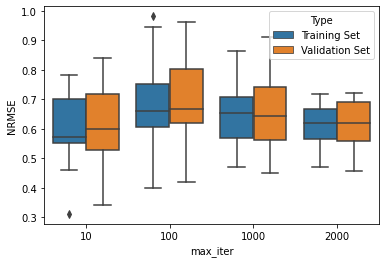

In [ ]:
num_of_samples = 1000                                                                                               # no. of samples
feat_dimens = 10                                                                                                    # feature dimension
max_iter= [10,100,1000,2000]
dic_NRMSE = []                                                                                                      # initialize for NRMSE 

for seeed in range(0,15):
  np.random.seed(seeed)                                                                                             # Generates pseudo-random number based on seed
  for iter in max_iter:
    w_target = np.random.randint(num_of_samples, size = (feat_dimens+1,1))                                          # weight vector for target value (fixed)
    X1 = data_matrix(num_of_samples, feat_dimens)                                                                   # Data Matrix X
    X1_training, X1_validation = X1[:int(0.7*num_of_samples)], X1[int(0.7*num_of_samples):]                         # split X into training and validation set
    w_train, NRMSE_train = Gradient_Descent(X1_training, w, target_t(X1_training, w_target, noise(X1_training, mu, std)), 0.1, iter, 1e-6, 0, 0)    # calculate training weight vector and MSE value from pseudoInverse

    MSE_valid = MSE(X1_validation , w_train, target_t(X1_validation, w_target, noise(X1_validation, mu, std)))                                       # find the value of validation MSE

    t_train = target_t(X1_training, w_target, noise(X1_training, mu, std))                                                 # training target vector t
    t_valid = target_t(X1_validation, w_target, noise(X1_validation, mu, std))                                             # validation target vector t
    NRMSE_valid = np.sqrt(MSE_valid)/np.std(t_valid)                                                                       # It should be a single number. Vaildation_RMSE/std_dev(t)

    dic_NRMSE.append({'seed': seeed, 'NRMSE': NRMSE_train, 'max_iter': iter, 'Type': "Training Set"})     # append the data of Training set of NRMSE
    dic_NRMSE.append({'seed': seeed, 'NRMSE': NRMSE_valid, 'max_iter': iter, 'Type': "Validation Set"})   # append the data of Validation set of NRMSE

NRMSE_df_g = pd.DataFrame(dic_NRMSE)                                                                    # make dataframe
NRMSE_df_g.to_csv("/content/drive/My Drive/q_13_g.csv")                                                                # save the file into drive 
# print(NRMSE_df_g)
seaborn.boxplot(data = NRMSE_df_g , x="max_iter", y="NRMSE", hue="Type")

The NRMSE value decreases as number of iteration increases beacause it take more iteration to minimize the NRMSE which we also seen in above boxplot after 100 iterations onwards we see that decreases in value of NRMSE. I am not able to do for more than 2000 iteration because it takes too much time to run.

In [ ]:
g_graph = pd.read_csv("drive/My Drive/q_13_g.csv")                          # load the file from drive
# seaborn.boxplot(data = g_graph, x="max_iter", y="NRMSE", hue="Type")

h) Training and validation NRMSE obtained using gradient descent with eta

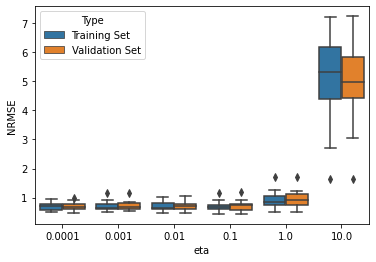

In [ ]:
num_of_samples = 1000                                                                                                # no. of samples
feat_dimens = 10                                                                                                     # feature dimension
eta= [1e-4,1e-3,1e-2,1e-1,1,10]
dic_NRMSE = []                                                                                                       # initialize for NRMSE 

for seeed in range(0,15):
  np.random.seed(seeed)                                                                                              # Generates pseudo-random number based on seed
  for et in eta:
    w_target = np.random.randint(num_of_samples, size = (feat_dimens+1,1))                                           # weight vector for target value (fixed)
    X1 = data_matrix(num_of_samples, feat_dimens)                                                                    # Data Matrix X
    X1_training, X1_validation = X1[:int(0.7*num_of_samples)], X1[int(0.7*num_of_samples):]                          # split X into training and validation set
    w_train, NRMSE_train = Gradient_Descent(X1_training, w, target_t(X1_training, w_target, noise(X1_training, mu, std)), et, 1000, 1e-8, 0, 0)       # calculate training weight vector and MSE value from pseudoInverse

    MSE_valid = MSE(X1_validation , w_train, target_t(X1_validation, w_target, noise(X1_validation, mu, std)))                                       # find the value of validation MSE
 
    t_train = target_t(X1_training, w_target, noise(X1_training, mu, std))                                                 # training target vector t
    t_valid = target_t(X1_validation, w_target, noise(X1_validation, mu, std))                                             # validation target vector t
    NRMSE_valid = np.sqrt(MSE_valid)/np.std(t_valid)                                                                       # It should be a single number. Vaildation_RMSE/std_dev(t)

    dic_NRMSE.append({'seed': seeed, 'NRMSE': NRMSE_train, 'eta': et, 'Type': "Training Set"})     # append the data of Training set of NRMSE
    dic_NRMSE.append({'seed': seeed, 'NRMSE': NRMSE_valid, 'eta': et, 'Type': "Validation Set"})   # append the data of Validation set of NRMSE

NRMSE_df_h = pd.DataFrame(dic_NRMSE)                                                               # make dataframe
NRMSE_df_h.to_csv("/content/drive/My Drive/q_13_h.csv")                                                           # save the file into drive 
# print(NRMSE_df_h)
seaborn.boxplot(data = NRMSE_df_h , x="eta", y="NRMSE", hue="Type")

As the value of eta factor increases, NRMSE also increases and we can also see that NRMSE value median is almost same for eta value range from 0.0001 to 0.1 after that NRMSE value increases gradually.
 

In [ ]:
h_graph = pd.read_csv("drive/My Drive/q_13_h.csv")                          # load the file from drive
# seaborn.boxplot(data = h_graph, x="eta", y="NRMSE", hue="Type")

i) and j) Time taken to solve gradient descent with number of samples and number of variables and its breaking points

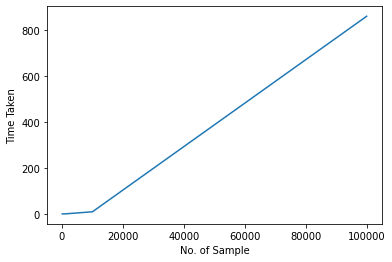

In [ ]:
samples = [100,1000,10000,100000]                                                                          # Number of samples
feat_dim = 10                                                                                                      # feature dimension
w_target = np.random.randint(num_of_samples, size = (feat_dim+1,1))                                                # weight vector for target value (fixed)
dic_NRMSE = []                                                                                                     # initialize for NRMSE Q13 part (a)
dic_time = []                                                                                                      # initialize for time Q13 part (f)
import time
for no_samples in samples:
  X1 = data_matrix(no_samples, feat_dim)                                                                           # Data Matrix X
  X1_training, X1_validation = X1[:int(0.7*no_samples)], X1[int(0.7*no_samples):]                                  # split X into training and validation set
  start = time.time()                                                                                              # Start Time

  w_train, NRMSE_train = Gradient_Descent(X1_training, w, target_t(X1_training, w_target, noise(X1_training, mu, std)), 0.01, 100, 1e-4, 0, 0)           # calculate training weight vector and MSE value from pseudoInverse
  last = time.time()                                                                                               # End Time
  time_taken = last - start                                                                                        # Time Taken to run pseudoIverse function
  MSE_valid = MSE(X1_validation , w_train, target_t(X1_validation, w_target, noise(X1_validation, mu, std)))       # find the value of validation MSE

  t_train = target_t(X1_training, w_target, noise(X1_training, mu, std))                                           # training target vector t
  t_valid = target_t(X1_validation, w_target, noise(X1_validation, mu, std))                                       # validation target vector t
  NRMSE_valid = np.sqrt(MSE_valid)/np.std(t_valid)                                                                 # It should be a single number. Vaildation_RMSE/std_dev(t)

  dic_NRMSE.append({'NRMSE': NRMSE_train, 'No. of Sample': no_samples, 'Type': "Training Set"})     # append the data of Training set of NRMSE
  dic_NRMSE.append({'NRMSE': NRMSE_valid, 'No. of Sample': no_samples, 'Type': "Validation Set"})   # append the data of Validation set of NRMSE
  dic_time.append({'Time Taken': time_taken, 'No. of Sample': no_samples})                          # append the data of Time taken

time_df_i1 = pd.DataFrame(dic_time)                                                                 # make dataframe
time_df_i1.to_csv("/content/drive/My Drive/q_13_i1.csv")                                                           # save the file into drive
# print(time_df_i1)
seaborn.lineplot(data = time_df_i1 , x="No. of Sample", y="Time Taken")

As the number of samples increases, it take more time to find Gradient Descent because of matrix multiplication take more time to do large data calculation in the equation of ∑[(wi.xi-ti)xi].
Here we can observe the graph between time taken and number of samples increases linearly.

In [ ]:
i1_graph = pd.read_csv("drive/My Drive/q_13_i1.csv")                          # load the file from drive
# seaborn.lineplot(data = i1_graph, x="No. of Sample", y="Time Taken")

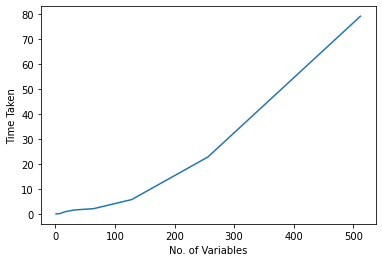

In [ ]:
num_of_samples = 1000                                                                                              # no. of samples
variables = [1,2,4,8,16,32,64,128,256,512]                                                          # feature dimension
dic_NRMSE = []                                                                                                     # initialize for NRMSE Q13 
dic_time = []                                                                                                      # initialize for time Q13 
import time
for feat_dim in variables:
  w_target = np.random.randint(num_of_samples, size = (feat_dim+1,1))                                          # weight vector for target value (fixed)
  w = np.random.randint(num_of_samples, size = (feat_dim+1,1)) 
  X1 = data_matrix(num_of_samples, feat_dim)                                                                   # Data Matrix X
  X1_training, X1_validation = X1[:int(0.7*num_of_samples)], X1[int(0.7*num_of_samples):]                          # split X into training and validation set
  start = time.time()                                                                                              # Start Time
  w_train, NRMSE_train = Gradient_Descent(X1_training, w, target_t(X1_training, w_target, noise(X1_training, mu, std)), 0.01, 100, 1e-4, 0, 0)     # calculate training weight vector and MSE value from pseudoInverse

  last = time.time()                                                                                               # End Time
  time_taken = last - start                                                                                        # Time Taken to run pseudoIverse function
  MSE_valid = MSE(X1_validation , w_train, target_t(X1_validation, w_target, noise(X1_validation, mu, std)))       # find the value of validation MSE

  t_train = target_t(X1_training, w_target, noise(X1_training, mu, std))                                           # training target vector t
  t_valid = target_t(X1_validation, w_target, noise(X1_validation, mu, std))                                       # validation target vector t
  NRMSE_valid = np.sqrt(MSE_valid)/np.std(t_valid)                                                                 # It should be a single number. Vaildation_RMSE/std_dev(t)

  dic_NRMSE.append({'NRMSE': NRMSE_train, 'No. of Variables': feat_dim, 'Type': "Training Set"})     # append the data of Training set of NRMSE
  dic_NRMSE.append({'NRMSE': NRMSE_valid, 'No. of Variables': feat_dim, 'Type': "Validation Set"})   # append the data of Validation set of NRMSE
  dic_time.append({'Time Taken': time_taken, 'No. of Variables': feat_dim})                          # append the data of Time taken

time_df_i2 = pd.DataFrame(dic_time)                                                                      # make dataframe
time_df_i2.to_csv("/content/drive/My Drive/q_13_i2.csv")                                                                # save the file into drive
# print(time_df_i2)
seaborn.lineplot(data = time_df_i2 , x="No. of Variables", y="Time Taken")

As the number of variables increases, it take more time to find Gradient Descent because of matrix multiplication take more time to do large data calculation in the equation of ∑[(wi.xi-ti)xi]. Here we can observe the graph between time taken and number of samples are somewhat linear onwards 250 no.of variables.

In [ ]:
i2_graph = pd.read_csv("drive/My Drive/q_13_i2.csv")                          # load the file from drive
# seaborn.lineplot(data = i2_graph, x="No. of Variables", y="Time Taken")

k) Training and validation NRMSE and number of nearly zero weights obtained using gradient descent with lambda2

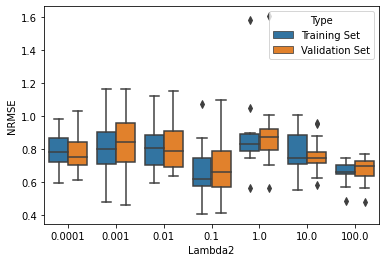

In [29]:
# feat_dim = 10    
num_of_samples = 1000                                                                                               # no. of samples
feat_dimens = 10                                                                                                    # feature dimension
lambda2 = [0.0001,0.001,0.01,0.1,1,10,100]
dic_NRMSE = []                                                                                                      # initialize for NRMSE 
dic_weight = []

for seeed in range(0,15):
  np.random.seed(seeed)                                                                                             # Generates pseudo-random number based on seed
  for lb2 in lambda2:
    w_target = np.random.randint(num_of_samples, size = (feat_dimens+1,1))                                          # weight vector for target value (fixed)
    X1 = data_matrix(num_of_samples, feat_dimens)                                                                   # Data Matrix X
    X1_training, X1_validation = X1[:int(0.7*num_of_samples)], X1[int(0.7*num_of_samples):]                         # split X into training and validation set
    w_train, NRMSE_train = Gradient_Descent(X1_training, w, target_t(X1_training, w_target, noise(X1_training, mu, std)), 0.1, 100, 1e-6, lb2, 0)    # calculate training weight vector and MSE value from pseudoInverse
     # print({'seed': seeed, 'lambda2': lb2, 'weight': np.transpose(w_train)})
    MSE_valid = MSE(X1_validation , w_train, target_t(X1_validation, w_target, noise(X1_validation, mu, std)))       # find the value of validation MSE
 
    t_train = target_t(X1_training, w_target, noise(X1_training, mu, std))                                           # training target vector t
    t_valid = target_t(X1_validation, w_target, noise(X1_validation, mu, std))                                       # validation target vector t
    NRMSE_valid = np.sqrt(MSE_valid)/np.std(t_valid)                                                                 # It should be a single number. Vaildation_RMSE/std_dev(t)

    dic_NRMSE.append({'seed': seeed, 'NRMSE': NRMSE_train, 'Lambda2': lb2, 'Type': "Training Set"})     # append the data of Training set of NRMSE
    dic_NRMSE.append({'seed': seeed, 'NRMSE': NRMSE_valid, 'Lambda2': lb2, 'Type': "Validation Set"})   # append the data of Validation set of NRMSE
    dic_weight.append({'seed': seeed, 'wieght vector': w_train, 'Lambda2': lb2})

NRMSE_df_k = pd.DataFrame(dic_NRMSE)                                                                     # make dataframe
weight_k = pd.DataFrame(dic_weight)
weight_k.to_csv("/content/drive/My Drive/q_13_k_1.csv")
NRMSE_df_k.to_csv("/content/drive/My Drive/q_13_k.csv")                                                                 # save the file into drive
# print(NRMSE_df_k)
seaborn.boxplot(data = NRMSE_df_k , x="Lambda2", y="NRMSE", hue="Type")

As the value of lambda increases, first NRMSE value increases and then decreases and here, we get the optimal value of lambda is 0.1 at which error is 0.413894167316492 

As λ increases(λ ≥ 100) the weights start becoming ≈0 ,The targets predicted ≈0 hence validation rmse saturates.

In [ ]:
k_graph = pd.read_csv("drive/My Drive/q_13_k.csv")                          # load the file from drive
# seaborn.boxplot(data = k_graph, x="Lambda2", y="NRMSE", hue="Type")

l) Training and validation NRMSE and number of nearly zero weights obtained using gradient descent with lambda1

{'seed': 0, 'lambda1': 0.0001, 'weight': array([[368.98191958, 972.10491585,  31.44403524, 788.3326474 ,
         94.89719699, 855.31156163, 988.63282894, 328.4079687 ,
        342.00302599, 517.66203448, 647.58802312]])}
{'seed': 0, 'lambda1': 0.001, 'weight': array([[369.03088953, 968.66885475,  30.84383942, 785.56214135,
         92.66990826, 860.65374525, 987.72968095, 323.75471741,
        347.5521136 , 512.40318338, 641.25569829]])}
{'seed': 0, 'lambda1': 0.01, 'weight': array([[368.96902974, 972.7646833 ,  31.32087064, 789.84792677,
         88.74377237, 859.79729441, 988.81869966, 318.59773673,
        354.55440441, 512.20848186, 647.24560642]])}
{'seed': 0, 'lambda1': 0.1, 'weight': array([[368.99196887, 970.48618853,  38.343618  , 788.21407429,
         91.00270227, 854.4007635 , 986.7850515 , 319.67973076,
        347.04381189, 511.04409519, 641.19000161]])}
{'seed': 0, 'lambda1': 1, 'weight': array([[368.99629467, 963.25125696,  22.78492411, 787.7636231 ,
         83.985159

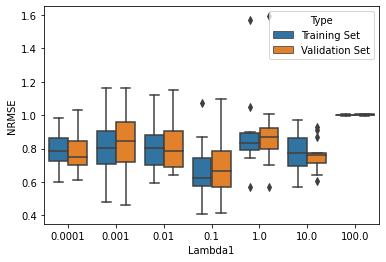

In [38]:
num_of_samples = 1000                                                                                                # no. of samples
feat_dimens = 10                                                                                                     # feature dimension
lambda1 = [0.0001,0.001,0.01,0.1,1,10,100]
dic_NRMSE = []                                                                                                       # initialize for NRMSE 
dic_weight = []
for seeed in range(0,15):
  np.random.seed(seeed)                                                                                              # Generates pseudo-random number based on seed
  for lb1 in lambda1:
    w_target = np.random.randint(num_of_samples, size = (feat_dimens+1,1))                                           # weight vector for target value (fixed)
    X1 = data_matrix(num_of_samples, feat_dimens)                                                                    # Data Matrix X
    X1_training, X1_validation = X1[:int(0.7*num_of_samples)], X1[int(0.7*num_of_samples):]                          # split X into training and validation set
    w_train, NRMSE_train = Gradient_Descent(X1_training, w, target_t(X1_training, w_target, noise(X1_training, mu, std)), 0.1, 100, 1e-6, 0, lb1)           # calculate training weight vector and MSE value from pseudoInverse
    # print({'seed': seeed, 'lambda1': lb1, 'weight': np.transpose(w_train)})
    MSE_valid = MSE(X1_validation , w_train, target_t(X1_validation, w_target, noise(X1_validation, mu, std)))       # find the value of validation MSE
 
    t_train = target_t(X1_training, w_target, noise(X1_training, mu, std))                                           # training target vector t
    t_valid = target_t(X1_validation, w_target, noise(X1_validation, mu, std))                                       # validation target vector t
    NRMSE_valid = np.sqrt(MSE_valid)/np.std(t_valid)                                                                 # It should be a single number. Vaildation_RMSE/std_dev(t)

    dic_NRMSE.append({'seed': seeed, 'NRMSE': NRMSE_train, 'Lambda1': lb1, 'Type': "Training Set"})     # append the data of Training set of NRMSE
    dic_NRMSE.append({'seed': seeed, 'NRMSE': NRMSE_valid, 'Lambda1': lb1, 'Type': "Validation Set"})   # append the data of Validation set of NRMSE
    dic_weight.append({'seed': seeed, 'wieght vector': w_train, 'Lambda2': lb1})

NRMSE_df_l = pd.DataFrame(dic_NRMSE)                                                                     # make dataframe
weight_l = pd.DataFrame(dic_weight)
weight_l.to_csv("/content/drive/My Drive/q_13_l_1.csv")
NRMSE_df_l.to_csv("/content/drive/My Drive/q_13_l.csv")                                                                 # save the file into drive
# print(NRMSE_df_l)
seaborn.boxplot(data = NRMSE_df_l , x="Lambda1", y="NRMSE", hue="Type")

As the value of lambda increases, first NRMSE value increases and then decreases and here, we get the optimal value of lambda is 0.1 at which error is 0.413763385396936

As λ increases(λ ≥ 100) the weights start becoming ≈0 ,The targets predicted ≈0 hence validation rmse saturates.

In [ ]:
l_graph = pd.read_csv("drive/My Drive/q_13_l.csv")                          # load the file from drive
# seaborn.boxplot(data = l_graph, x="Lambda1", y="NRMSE", hue="Type")

m) Training and validation NRMSE for optimal lambda2 with noise variance

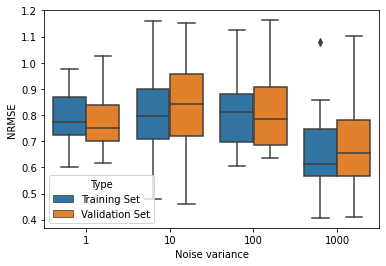

In [37]:
optimal_lb2 = 0.1
num_of_samples = 1000                                                                                              # no. of samples
feat_dimens = 10                                                                                                   # feature dimension
noise_vari = [1,10,100,1000]
dic_NRMSE = []                                                                                                     # initialize for NRMSE 

for seeed in range(0,15):
  np.random.seed(seeed)                                                                                            # Generates pseudo-random number based on seed
  for noiise in noise_vari:
    w_target = np.random.randint(num_of_samples, size = (feat_dimens+1,1))                                         # weight vector for target value (fixed)
    X1 = data_matrix(num_of_samples, feat_dimens)                                                                  # Data Matrix X
    X1_training, X1_validation = X1[:int(0.7*num_of_samples)], X1[int(0.7*num_of_samples):]                        # split X into training and validation set
    w_train, NRMSE_train = Gradient_Descent(X1_training, w, target_t(X1_training, w_target, noise(X1_training, mu, noiise)), 0.1, 500, 1e-6, optimal_lb2, 0)           # calculate training weight vector and MSE value from pseudoInverse

    MSE_valid = MSE(X1_validation , w_train, target_t(X1_validation, w_target, noise(X1_validation, mu, noiise))) # find the value of validation MSE


    t_train = target_t(X1_training, w_target, noise(X1_training, mu, std))                                        # training target vector t
    t_valid = target_t(X1_validation, w_target, noise(X1_validation, mu, std))                                    # validation target vector t
    NRMSE_valid = np.sqrt(MSE_valid)/np.std(t_valid)                                                              # It should be a single number. Vaildation_RMSE/std_dev(t)

    dic_NRMSE.append({'seed': seeed, 'NRMSE': NRMSE_train, 'Noise variance': noiise, 'Type': "Training Set"})     # append the data of Training set of NRMSE
    dic_NRMSE.append({'seed': seeed, 'NRMSE': NRMSE_valid, 'Noise variance': noiise, 'Type': "Validation Set"})   # append the data of Validation set of NRMSE
   
NRMSE_df_m = pd.DataFrame(dic_NRMSE)                                                                              # make dataframe
NRMSE_df_m.to_csv("/content/drive/My Drive/q_13_m.csv")                                                           # save the file into drive
# print(NRMSE_df_m)
seaborn.boxplot(data = NRMSE_df_m , x="Noise variance", y="NRMSE", hue="Type")

As noise variance increases at fixed optimal value of λ=0.1, error value first increases but at noise var = 1000, error has decreased.

In [ ]:
m_graph = pd.read_csv("drive/My Drive/q_13_m.csv")                          # load the file from drive
# seaborn.boxplot(data = m_graph, x="Noise variance", y="NRMSE", hue="Type")

n) Training and validation NRMSE for optimal lambda1 with noise variance

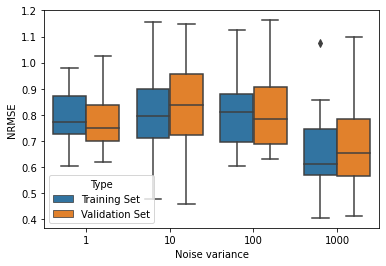

In [39]:
optimal_lb1 = 0.1
num_of_samples = 1000                                                                                             # no. of samples
feat_dimens = 10                                                                                                  # feature dimension
noise_vari = [1,10,100,1000]
dic_NRMSE = []                                                                                                    # initialize for NRMSE Q13 

for seeed in range(0,15):
  np.random.seed(seeed)                                                                                           # Generates pseudo-random number based on seed
  for noiiise in noise_vari:
    w_target = np.random.randint(num_of_samples, size = (feat_dimens+1,1))                                        # weight vector for target value (fixed)
    X1 = data_matrix(num_of_samples, feat_dimens)                                                                 # Data Matrix X
    X1_training, X1_validation = X1[:int(0.7*num_of_samples)], X1[int(0.7*num_of_samples):]                       # split X into training and validation set
    w_train, NRMSE_train = Gradient_Descent(X1_training, w, target_t(X1_training, w_target, noise(X1_training, mu, noiiise)), 0.1, 500, 1e-6, 0, optimal_lb1)           # calculate training weight vector and MSE value from pseudoInverse

    MSE_valid = MSE(X1_validation , w_train, target_t(X1_validation, w_target, noise(X1_validation, mu, noiiise))) # find the value of validation MSE


    t_train = target_t(X1_training, w_target, noise(X1_training, mu, std))                                        # training target vector t
    t_valid = target_t(X1_validation, w_target, noise(X1_validation, mu, std))                                    # validation target vector t
    NRMSE_valid = np.sqrt(MSE_valid)/np.std(t_valid)                                                              # It should be a single number. Vaildation_RMSE/std_dev(t)

    dic_NRMSE.append({'seed': seeed, 'NRMSE': NRMSE_train, 'Noise variance': noiiise, 'Type': "Training Set"})     # append the data of Training set of NRMSE
    dic_NRMSE.append({'seed': seeed, 'NRMSE': NRMSE_valid, 'Noise variance': noiiise, 'Type': "Validation Set"})   # append the data of Validation set of NRMSE

NRMSE_df_n = pd.DataFrame(dic_NRMSE)                                                                              # make dataframe
NRMSE_df_n.to_csv("/content/drive/My Drive/q_13_n.csv")                                                           # save the file into drive
# print(NRMSE_df_n)
seaborn.boxplot(data = NRMSE_df_n , x="Noise variance", y="NRMSE", hue="Type")

As noise variance increases at fixed optimal value of λ=0.1, error value first increases but at noise var = 1000, error has decreased.

In [ ]:
n_graph = pd.read_csv("drive/My Drive/q_13_n.csv")                          # load the file from drive
# seaborn.boxplot(data = n_graph, x="Noise variance", y="NRMSE", hue="Type")

14. Write your overall learning points by doing entire assignment

# **Observation & Conclusion**
(i) Pseudo Inverse Method-

1. As the number of samples increases, the change in varation of NRMSE decreaes but median remains same.

2. As the number of variables increases, NRMSE decreases.

3. As the noise variance increases, NRMSE increases.

4. NRMSE do not depend on bias w0, there is no pattern.

5. As 1/λ increases Training RMSE decreases.

6. Time taken to solve the pseudo Inverse is linearly dependent with number of samples.

7. Time taken to solve the pseudo Inverse is somewhat linear with number of variables.

(ii) Gradient Descent Method-

1. The NRMSE value decreases as the max iteration increases.  

2. As the eta value from 0.001 to 0.1, there is no change in NRMSE but from values 0.1 onward, NRMSE increases.

3. Time taken to solve the Gradient Descent is linearly dependent with number of samples.

4. Time taken to solve the Gradient Descent is somewhat linear with number of variables.

5. As the lambda2 and lambda1 value increases, first error is increased then we get minimum error at λ=0.1 in both cases.

6. The approximate optimal λ2=0.1 for which validation rmse is minimum which is 0.413894167316492

7. The approximate optimal λ1=0.1 for which validation rmse is minimum which is 0.413763385396936

8.  As the noise variance with optimal lambda2 and optimal lambda1 value increases, error also increases.

<h3>final conclusion- PseudoInverse is the best in terms of nrmse loss.</h3>

15. Quote your references, including roll numbers of fellow students with whom you discussed. Be specific about which part was
inspired by what source or which friend.

1. I was discuss the logic and method of Task6, Task 13 with Athrava Warhade (190070012) but all the codes lines were written by myself individually.

2. Take the help from below website for making boxplot and lineplot from seaborn library- https://seaborn.pydata.org/generated/seaborn.boxplot.html